Case Study: Predicting Company Bankruptcy Using Financial Data
Objective: To perform an in-depth analysis of a financial dataset to predict the likelihood of a
company going bankrupt. The analysis involves data preprocessing, exploratory data analysis
(EDA), hypothesis testing, feature engineering and selection, and applying machine learning
techniques for classification.

#### 1. Data Understanding and Preprocessing:

In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # visualization data 
%matplotlib inline
import seaborn as sns 

### Load and inspect the dataset.

In [69]:
df =  pd.read_csv("data.csv")

In [70]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [71]:
df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+0

In [72]:
df.shape

(6819, 96)

### Handle missing values appropriately.

In [73]:
## Here we check the type of data,is there null values present or not means the information of all columns
df.info()
## no null values are present in this dataset  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [74]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [75]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [76]:
# Changed the Bankrupt column name to make input easier
df = df.rename(columns={'Bankrupt?': 'Bankrupt'})

In [77]:
df.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

In [78]:
# select columns that are not numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Check if there are columns that are not numeric columns
if not non_numeric_columns.empty:
     print("Non-numeric columns:")
     print(non_numeric_columns.columns)
else:
     print("All columns are numerical.")

All columns are numerical.


In [79]:
pd.set_option('display.max_columns', None)
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.00688

### Detect and handle outliers.

In [80]:
import numpy as np
df1=df
df1 = df1.drop(['Bankrupt', ' Liability-Assets Flag', ' Net Income Flag'], axis=1)
df2=df['Bankrupt']

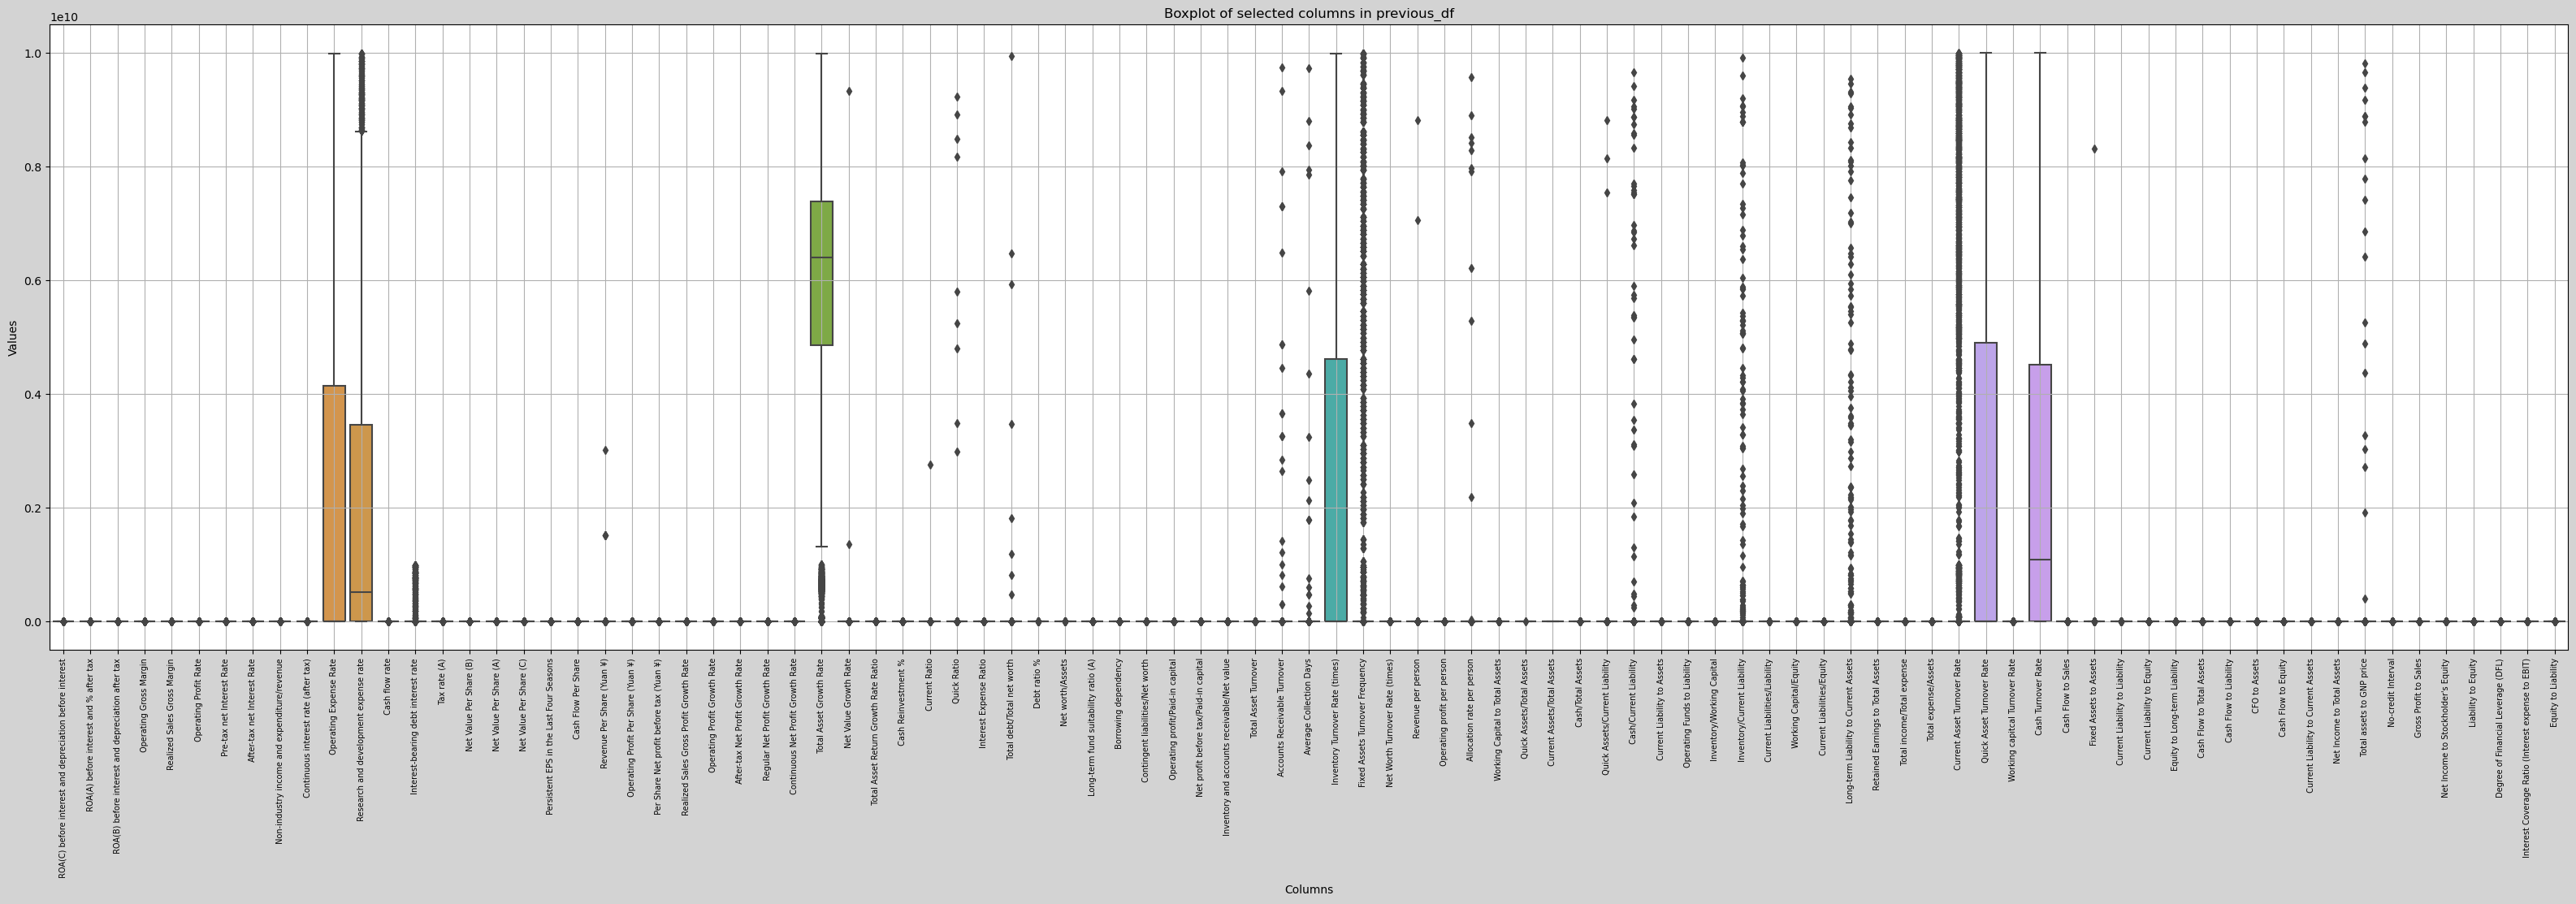

In [81]:
fig = plt.figure(figsize=(40,10))
sns.boxplot(data=df1[[
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       " Net Income to Stockholder's Equity", ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability']])
plt.xticks(rotation =90,fontsize =7)
plt.title("Boxplot of selected columns in previous_df")
plt.ylabel("Values")
plt.xlabel("Columns")

fig.set_facecolor("lightgrey")
plt.grid(True)
plt.show()

In [82]:
#handling outliers 
# by calculating upper bound lower bound 

def impute(df, col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df.loc[df[col] < lb, col] = q1
    df.loc[df[col] > ub, col] = q3

for col in df1.columns:
    impute(df1, col)
print(df1)


       ROA(C) before interest and depreciation before interest  \
0                                              0.476527          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.535543   
1                                    0.538214   
2                                    0.499019   
3          

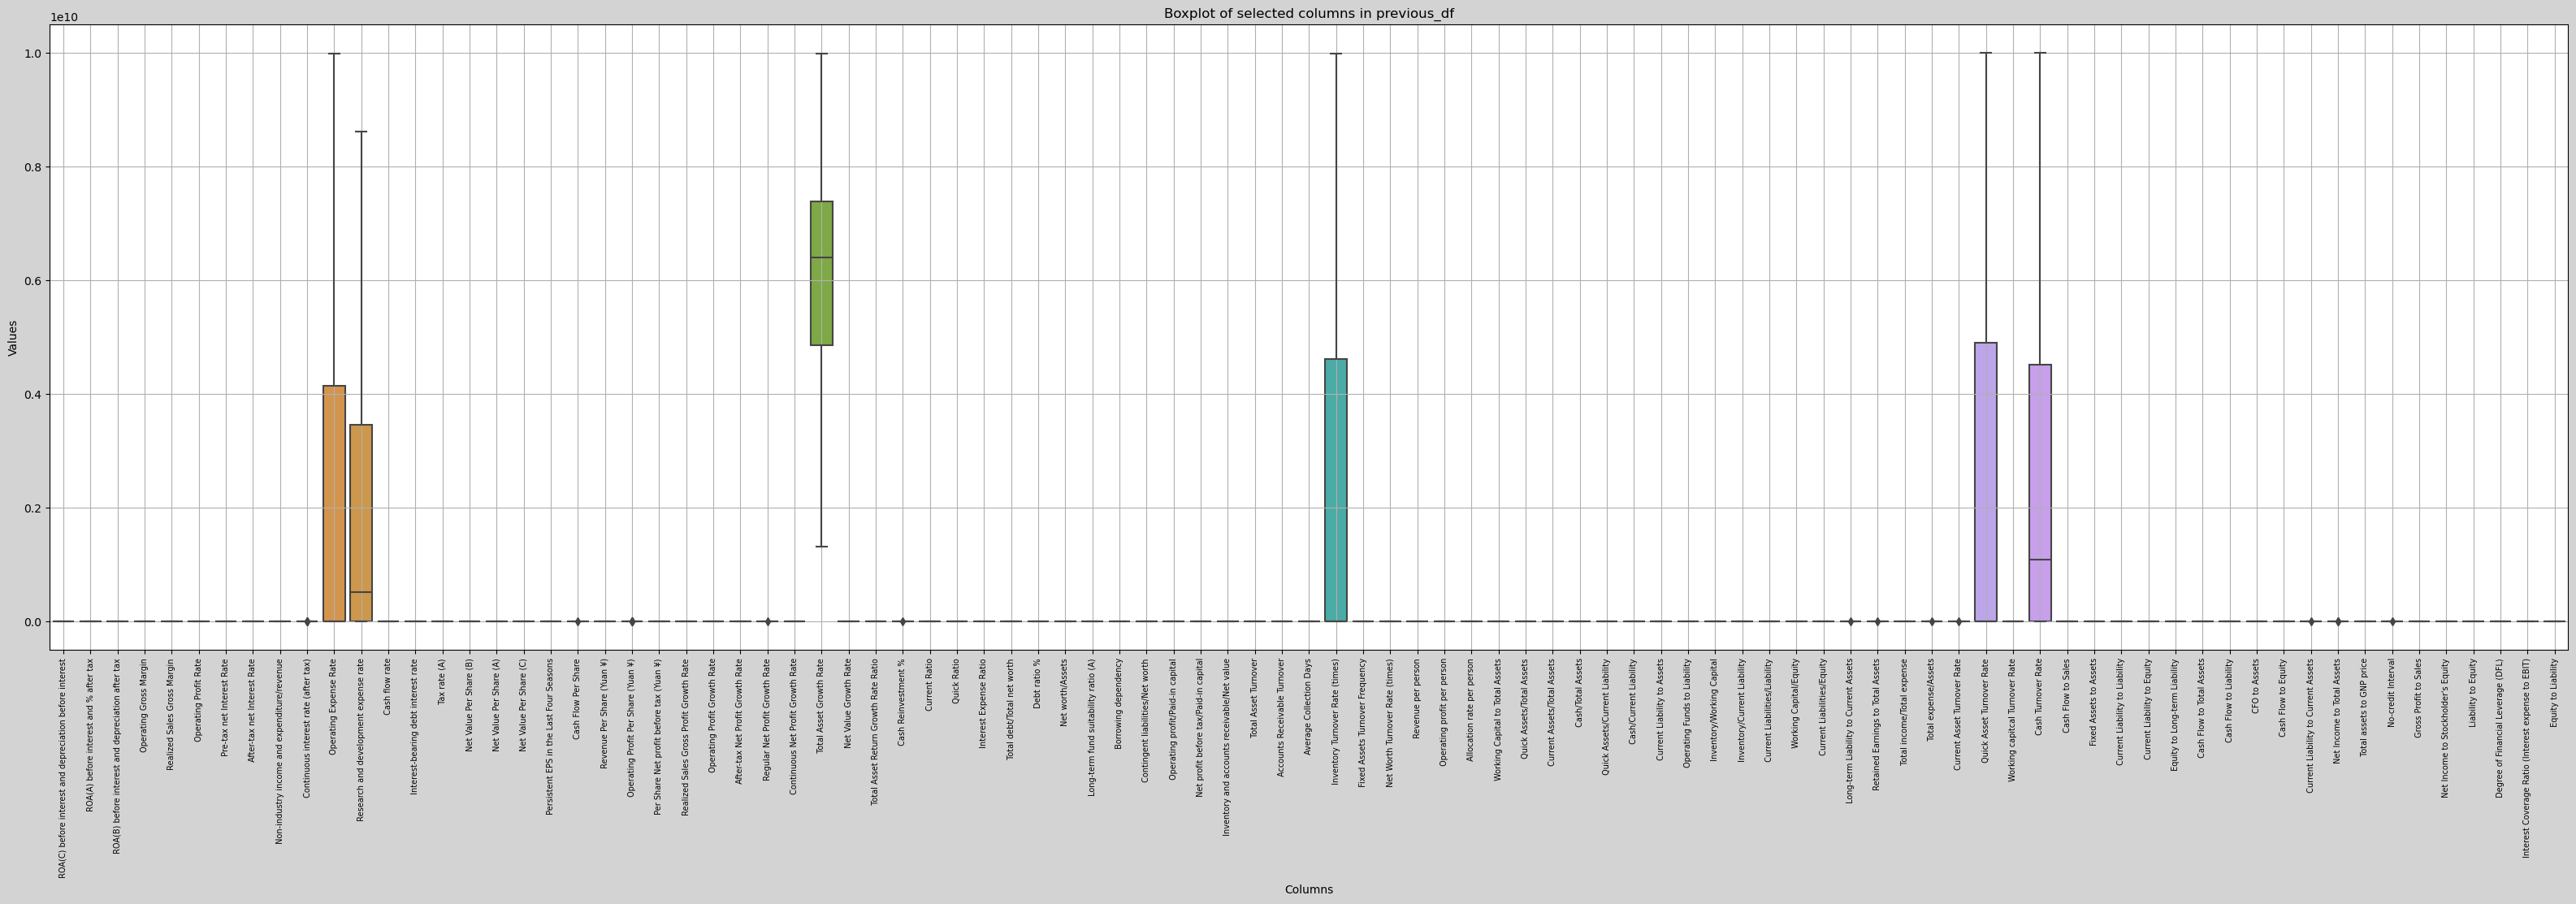

In [83]:
fig = plt.figure(figsize=(40,10))
sns.boxplot(data=df1[[
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       " Net Income to Stockholder's Equity", ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability']])
plt.xticks(rotation =90,fontsize =7)
plt.title("Boxplot of selected columns in previous_df")
plt.ylabel("Values")
plt.xlabel("Columns")

fig.set_facecolor("lightgrey")
plt.grid(True)
plt.show()

In [84]:
df = pd.concat([df2,df1], axis=1)
df

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.476527,0.535543,0.527277,0.601457,0.601457,0.998969,0.797386,0.809312,0.303466,0.781567,1.256969e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.214711,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000441,0.263100,0.363725,0.002259,0.001208,0.629951,0.009273,0.207576,0.792424,0.005024,0.376271,0.005764,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,0.000117,0.032903,0.034164,0.392913,0.015020,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.733612,0.332322,0.009006,0.931097,0.002022,0.064856,0.000453,6.550000e+09,0.593934,4.580000e+08,0.671568,0.424206,0.676269,0.332322,0.117106,0.637555,0.458609,0.520382,0.312905,0.038375,0.796750,0.009219,0.622879,0.601453,0.840115,0.281449,0.026791,0.565158,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.631125,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,0.003652,0.025484,0.006889,0.391590,0.012335,0.751111,0

### 2. Exploratory Data Analysis (EDA)

### Generate Descriptive Statistics

In [85]:
print(df.describe())

          Bankrupt   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505628          
std       0.176710                                           0.043600          
min       0.000000                                           0.388047          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           0.623800          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.561651   
std                                   0.040308   
min                                   0.455190   
25%                          

### Visualize Feature Distributions and Target Variable

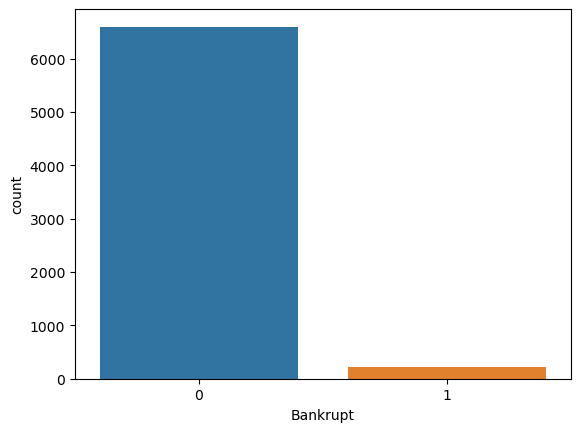

In [86]:
# Histogram of target variable
sns.countplot(x='Bankrupt', data=df)
plt.show()
# Bankrupt = 1 for bankruptcy & 0 for non-bankruptcy
# non-bankrupt is more than bankrupt 

In [87]:
df['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

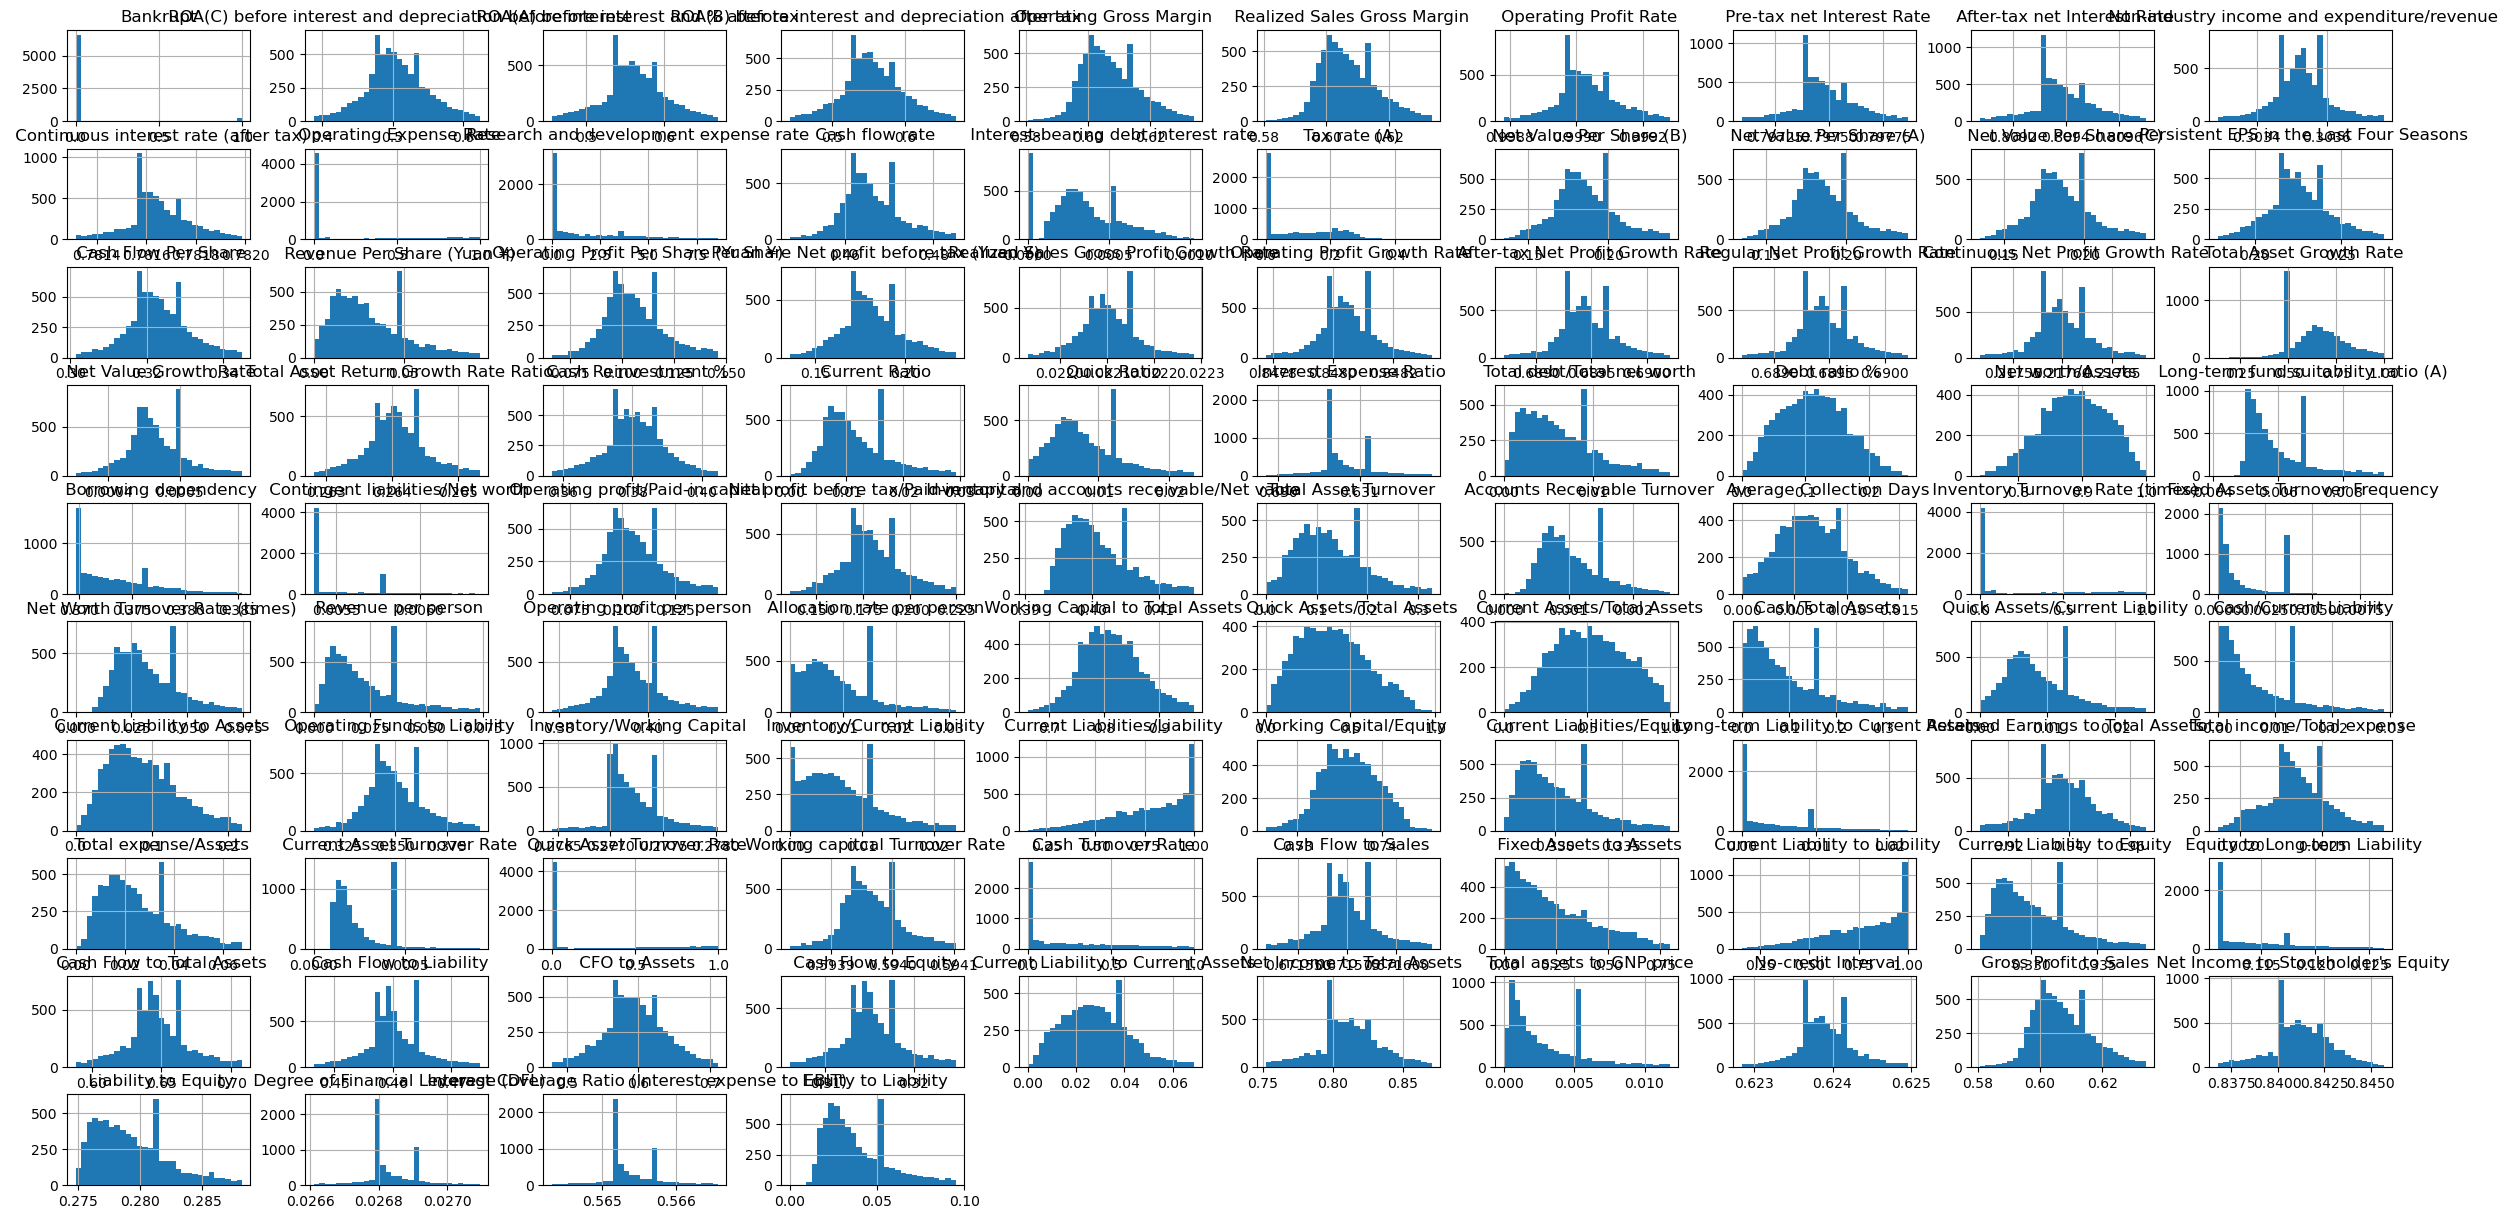

In [88]:
# Histograms for features
df.hist(bins=30, figsize=(30, 15))
plt.show()

###  Analyze Relationships Between Features and Target Variable

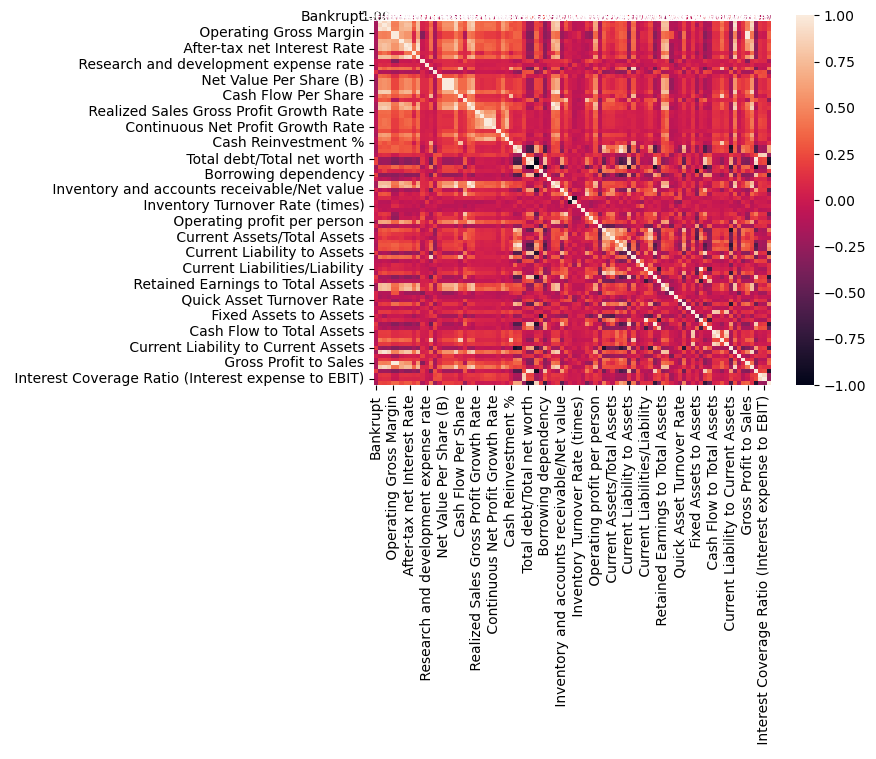

In [89]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

In [90]:
# near 1 strong correlation 
# near 0 weak correlation
df.corr()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt,1.000000,-0.195030,-0.183558,-0.191473,-0.140408,-0.139279,-0.161536,-0.177958,-0.168347,-0.165014,-0.177109,-0.006083,-0.025688,-0.128429,0.136167,-0.131673,-0.204560,-0.203268,-0.201980,-0.196711,-0.121086,-0.067058,-0.177045,-0.202248,-0.085585,-0.080370,-0.084173,-0.083556,-0.097918,-0.123544,-0.172084,-0.078500,-0.091227,-0.171501,-0.178737,-0.110883,0.200356,0.223222,-0.223222,-0.091440,0.207662,0.023178,-0.174674,-0.202265,0.080259,-0.083286,-0.025307,0.027596,-0.001376,0.049015,0.004075,0.027676,-0.138372,0.080817,-0.184229,-0.086365,-0.044823,-0.122211,-0.170082,-0.114200,0.171176,-0.132982,-0.065867,-0.045057,-0.021909,-0.118344,0.164076,0.069528,-0.178458,-0.231259,0.062590,0.061324,0.025814,-0.143227,-0.018035,-0.076076,0.063601,-0.021909,0.164076,0.094676,-0.073919,-0.073717,-0.120006,-0.077713,0.167180,-0.180235,0.048388,-0.101717,-0.140408,-0.154785,0.191227,-0.112874,-0.094457,-0.179640
ROA(C) before interest and depreciation before interest,-0.195030,1.000000,0.878776,0.953324,0.473570,0.472237,0.710248,0.735020,0.715560,0.306800,0.743335,0.053672,0.108934,0.413625,-0.128353,0.354561,0.517585,0.517363,0.516945,0.824992,0.460988,0.297927,0.752884,0.809716,0.376753,0.354280,0.373373,0.373175,0.383768,0.269585,0.579774,0.436054,0.331676,0.254830,0.301454,0.101141,-0.222332,-0.228597,0.228597,0.071739,-0.285421,-0.085777,0.75095

In [91]:
# for dropping the columns 
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Bankrupt']
lower_threshold = -0.20
upper_threshold = 0.20
columns_to_drop = [col for col in target_correlation.index if lower_threshold < target_correlation[col] < upper_threshold]
final_df = df.drop(columns=columns_to_drop)

In [92]:
final_df.shape

(6819, 11)

### 3. Hypothesis Testing


In [109]:
from scipy.stats import ttest_ind

# Hypothesis testing 
significant_features = []
for column in final_df.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt':
        bankrupt = final_df [final_df ['Bankrupt'] == 1][column]
        non_bankrupt = final_df [final_df ['Bankrupt'] == 0][column]
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
        if p_val < 0.05:
            significant_features.append(column)
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {significant_features}')

 Net Value Per Share (B): t-statistic=-17.25442408217845, p-value=2.492901903558006e-65
 Net Value Per Share (A): t-statistic=-17.140720023001798, p-value=1.6344051776886276e-64
 Net Value Per Share (C): t-statistic=-17.02744878485032, p-value=1.0519985212341264e-63
 Per Share Net profit before tax (Yuan ¥): t-statistic=-17.050982579129364, p-value=7.151662065868763e-64
 Total debt/Total net worth: t-statistic=16.884825118194538, p-value=1.079607467307037e-62
 Debt ratio %: t-statistic=18.907429698684233, p-value=9.418903661772947e-78
 Net worth/Assets: t-statistic=-18.907429698684254, p-value=9.418903661768918e-78
 Borrowing dependency: t-statistic=17.527704566995254, p-value=2.5933437240468133e-67
 Net profit before tax/Paid-in capital: t-statistic=-17.05250043402392, p-value=6.975728178074197e-64
 Total income/Total expense: t-statistic=-19.6259591679404, p-value=1.80742409667271e-83
Significant features: [' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share

### Modeling:

In [94]:
final_df .shape

(6819, 11)

In [95]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
x_train,x_test,y_train,y_test = train_test_split(final_df.drop('Bankrupt',axis=1),final_df.Bankrupt,test_size=0.2)

In [96]:
x_train  = sm.add_constant(x_train,prepend=False)

In [97]:
x_test = sm.add_constant(x_test,prepend=False)

In [98]:
mod1 = sm.Logit(y_train,x_train).fit()

         Current function value: 0.093941
         Iterations: 35


C:\Users\Diksha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [99]:
print(mod1.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5444
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3351
Time:                        21:10:10   Log-Likelihood:                -512.45
converged:                      False   LL-Null:                       -770.67
Covariance Type:            nonrobust   LLR p-value:                1.358e-104
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
 Net Value Per Share (B)                    -58.6052     41.440     -1.414      0.157    -139.827      22.616
 Net Value Per Share (A)              

In [100]:
mypred = mod1.predict(x_test)

In [101]:
mypred[:5]

6148    0.008937
4451    0.000772
6069    0.003037
1932    0.313171
4465    0.007953
dtype: float64

In [102]:
y_pred=[]

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
print(confusion_matrix(y_test,y_pred))

[[1311    7]
 [  42    4]]


In [106]:
from sklearn .metrics import classification_report

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.36      0.09      0.14        46

    accuracy                           0.96      1364
   macro avg       0.67      0.54      0.56      1364
weighted avg       0.95      0.96      0.95      1364



### 6. Model Interpretation and Insights:


### Interpret model coefficients to understand feature impact.

In [ ]:
#if the predictor's p-value is greater than 0.05 then Ho is rejected for that predictor and if it is greater than 0.05 then Ho is not rejected for that predictor
#For (-)ve coefficients as the value increases or goes away from 0 the probability of bankruptcy decreases. For per unit change in the predictor changes by the calculated coefficient.
#For (+)ve coefficients as the value increases the probability of bankruptcy increases. For per unit change in the predictor changes by the calculated coefficient.

### Summarize key insights and discuss implications for financial risk management.


In [ ]:
# This is the accuracy of my model 0.96.
# model is overfitted because data is biased towards non-bankrupt
# Total income/Total expense affects th most as the z value for this column is highest i.e -6.605 

### Provide actionable recommendations.